# ANLP Assignment: Sentiment Classification

In this assignment, you will be investigating NLP methods for distinguishing positive and negative reviews written about movies.

For assessment, you are expected to complete and submit this notebook file.  When answers require code, you may import and use library functions (unless explicitly told otherwise).  All of your own code should be included in the notebook rather than imported from elsewhere.  Written answers should also be included in the notebook.  You should insert as many extra cells as you want and change the type between code and markdown as appropriate.

In order to avoid misconduct, you should not talk about the assignment questions with your peers.  If you are not sure what a question is asking you to do or have any other questions, please ask me or one of the Teaching Assistants.

Marking guidelines are provided as a separate document.

The first few cells contain code to set-up the assignment and bring in some data.   In order to provide unique datasets for analysis by different students, you must enter your candidate number in the following cell.  Otherwise do not change the code in these cells.

In [208]:
candidateno= 277916 #this MUST be updated to your candidate number so that you get a unique data sample


In [209]:
#do not change the code in this cell
#preliminary imports

#set up nltk
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('movie_reviews')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.corpus import movie_reviews

#for setting up training and testing data
import random

#useful other tools
import re
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from itertools import zip_longest
from nltk.probability import FreqDist
from nltk.classify.api import ClassifierI


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!


In [210]:
#do not change the code in this cell
def split_data(data, ratio=0.7): # when the second argument is not given, it defaults to 0.7
    """
    Given corpus generator and ratio:
     - partitions the corpus into training data and test data, where the proportion in train is ratio,

    :param data: A corpus generator.
    :param ratio: The proportion of training documents (default 0.7)
    :return: a pair (tuple) of lists where the first element of the
            pair is a list of the training data and the second is a list of the test data.
    """

    data = list(data)
    n = len(data)
    train_indices = random.sample(range(n), int(n * ratio))
    test_indices = list(set(range(n)) - set(train_indices))
    train = [data[i] for i in train_indices]
    test = [data[i] for i in test_indices]
    return (train, test)


def get_train_test_data():

    #get ids of positive and negative movie reviews
    pos_review_ids=movie_reviews.fileids('pos')
    neg_review_ids=movie_reviews.fileids('neg')

    #split positive and negative data into training and testing sets
    pos_train_ids, pos_test_ids = split_data(pos_review_ids)
    neg_train_ids, neg_test_ids = split_data(neg_review_ids)
    #add labels to the data and concatenate
    training = [(movie_reviews.words(f),'pos') for f in pos_train_ids]+[(movie_reviews.words(f),'neg') for f in neg_train_ids]
    testing = [(movie_reviews.words(f),'pos') for f in pos_test_ids]+[(movie_reviews.words(f),'neg') for f in neg_test_ids]

    return training, testing

When you have run the cell below, your unique training and testing samples will be stored in `training_data` and `testing_data`

In [211]:
#do not change the code in this cell
random.seed(candidateno)
training_data,testing_data=get_train_test_data()
print("The amount of training data is {}".format(len(training_data)))
print("The amount of testing data is {}".format(len(testing_data)))
print("The representation of a single data item is below")
print(training_data[0])

The amount of training data is 1400
The amount of testing data is 600
The representation of a single data item is below
(['gordon', 'fleming', '(', 'peter', 'mullan', ')', ...], 'pos')


1)  
a) **Generate** a list of 10 content words which are representative of the positive reviews in your training data.

b) **Generate** a list of 10 content words which are representative of the negative reviews in your training data.

c) **Explain** what you have done and why

[20\%]

In [212]:
#STEP 1: Normalized the data set
stop = stopwords.words('english')

def normalise(wordlist):
  filtered = [word for word in wordlist if word not in stop and word.isalpha()]

  return filtered



In [213]:
# Normalized and frequency of each word
training_data_norm=[(FreqDist(normalise(wordlist)),label) for (wordlist,label) in training_data]
testing_data_norm=[(FreqDist(normalise(wordlist)),label) for (wordlist,label) in testing_data]

#Define empty variable for pos and negative review
pos_freq_dist=FreqDist()
neg_freq_dist=FreqDist()

# Apply list comprehension to
[pos_freq_dist.update(review_dist) if label == 'pos' else neg_freq_dist.update(review_dist) for review_dist, label in training_data_norm]

pos_freq_dist #testing my function

FreqDist({'film': 3524, 'one': 2058, 'movie': 1740, 'like': 1249, 'time': 857, 'good': 854, 'story': 849, 'also': 830, 'well': 808, 'even': 785, ...})

In [214]:
neg_freq_dist #testing my function

FreqDist({'film': 3086, 'movie': 2249, 'one': 1938, 'like': 1317, 'even': 968, 'good': 828, 'time': 804, 'would': 763, 'get': 759, 'bad': 732, ...})

In [215]:
#STEP 3
def most_frequent_words(posfreq,negfreq,topk):
    difference=posfreq-negfreq
    sorteddiff=difference.most_common()

    justwords=[word for (word,freq) in sorteddiff[:topk]]
    return justwords

top_pos=most_frequent_words(pos_freq_dist,neg_freq_dist,10)
print(top_pos)

top_neg=most_frequent_words(neg_freq_dist,pos_freq_dist,10)
print(top_neg)

['film', 'life', 'also', 'well', 'great', 'best', 'many', 'story', 'world', 'films']
['movie', 'bad', 'plot', 'even', 'worst', 'get', 'nothing', 'script', 'could', 'action']


**Step 1:** I normalized the data, both testing and training list of data, by writing a function "def normalize (wordlist)" to filter out stopwords and non-alphabetic characters.

**Step 2**:  I applied the ***normalized function*** created in step one on my training and testing data and ***the freq distribution function*** using list comprehensive. This is to clean my data and create frequency distributions for each word in the normalized training data based on the *'positive' or 'negative' label* defined at the beginning of the notebook.

Then, I aggregate the word frequencies separately for positive and negative reviews and store their frequency distribution in a variable called ***pos_feq_dist and neg_freq_dist*** respectively using list comprehensive to make my syntax short and neat.

**Step 3**: I define a function called ***most_frequent_words*** that takes two dictionaries: *positive review frequency (pos_freq_dist) and negative review frequency positive(neg_freq_dist)*. It'll then computes the difference between positive and negative frequencies for each word, sorts the differences, and returns the top word which gives me most common 10 words in my training data set.


2)
a) **Use** the lists generated in Q1 to build a **word list classifier** which will classify reviews as being positive or negative.

b) **Explain** what you have done.

[12.5\%]


In [216]:

class SimpleClassifier(ClassifierI):

    def __init__(self, pos, neg):
        self._pos = pos
        self._neg = neg

    def classify(self, doc): #doc is a FreqDist

        score = 0

        for word,value in doc.items():
            if word in self._pos:
                score+=value
            if word in self._neg:
                score-=value

        return "neg" if score < 0 else "pos"

    def classify_many(self, docs):  # with the classiy_many method, i can pass many document to classify once
        return [self.classify(doc) for doc in docs]

    def labels(self):
        return ("pos", "neg")

#Evaluate my classifier:

classifier = SimpleClassifier(top_pos,top_neg)
testing,labels=zip(*testing_data_norm) #Assuming testing_data_norm is a list of FreqDist documents
classifier.classify_many(testing)

['pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'neg',
 'neg',
 'pos',
 'pos',
 'neg',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'neg',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'neg',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'neg',
 'pos',
 'neg',
 'neg',
 'pos',
 'neg',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'neg',
 'pos',
 'neg',
 'neg',
 'pos',
 'neg',
 'neg',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'neg',
 'pos',
 'pos',
 'pos',
 'pos',
 'neg',
 'pos',
 'neg',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'neg',
 'pos',
 'pos',
 'pos',
 'pos',
 'neg',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'neg',
 'pos',
 'pos',
 'neg',
 'pos',
 'neg',


In [217]:
#Just testing function
#training,labels=zip(*training_data_norm)
#classifier.classify_many(training)



**Question 2: **
I constructed a simple classifier that inherit from classifierI. This classifier using lists of positive and negative terms, contains a classify method that compute score to determines a document's score by looking up words in its positive and negative lists. It then designates the score as "neg" otherwise and as "pos" if it is not negative.

With the added classify_many method, I can pass multiple documents to classify at once.





3)
a) **Calculate** the accuracy, precision, recall and F1 score of your classifier.

b) Is it reasonable to evaluate the classifier in terms of its accuracy?  **Explain** your answer and give a counter-example (a scenario where it would / would not be reasonable to evaluate the classifier in terms of its accuracy).

[20\%]

In [218]:
def classifier_evaluate(classifier, test_data):

    acc = 0
    docs,goldstandard=zip(*test_data)
    predictions= classifier.classify_many(docs)
    #zip the predictions with the goldstandard labels and compare
    for prediction,goldlabel in zip(predictions,goldstandard):
        if prediction==goldlabel:
            acc+=1

    return acc / (len(test_data))

movie_classifier1 = SimpleClassifier(top_pos,top_neg)

score = classifier_evaluate(movie_classifier1, testing_data_norm)
print(score)

0.6533333333333333


In [219]:
#Another method with using zip
def classifier_evaluation(classifier, test_data):
    correct = 0
    total_count = len(test_data)

    for document, label in test_data:
        prediction_label = classifier.classify(document)
        if prediction_label == label:
            correct += 1

    accuracy = correct / total_count
    return accuracy

# Evaluate classifier
accuracy = classifier_evaluation(movie_classifier1, testing_data_norm)
print("Accuracy:", accuracy)


Accuracy: 0.6533333333333333


In [220]:
class ConfusionMatrix:
    def __init__(self,predictions,goldstandard,classes=("pos","neg")):

        (self.c1,self.c2)=classes
        self.TP=0
        self.FP=0
        self.FN=0
        self.TN=0
        for p,g in zip(predictions,goldstandard):
            if g==self.c1:
                if p==self.c1:
                    self.TP+=1
                else:
                    self.FN+=1

            elif p==self.c1:
                self.FP+=1
            else:
                self.TN+=1


    def precision(self):
        p=0
        #compute precision here
        p = self.TP / (self.TP + self.FP)
        return p

    def recall(self):
        r=0
        #compute recall here
        r = self.FP/(self.FP + self.FN)
        return r

    def f1(self):
        f1=0
        #compute f1 here
        p=self.precision()
        r=self.recall()
        f1=p*r/(p+r)

        return f1

# This display and calculate various metrics for our class based on the predictions made by a classifier and the corresponding true labels
print("These are the metrics we calculated from the confusion matrix")

docs,labels=zip(*testing_data_norm)
sent_cmx=ConfusionMatrix(classifier.classify_many(docs),labels)
print(sent_cmx.TP)
print(sent_cmx.FP)
print(sent_cmx.TN)
print(sent_cmx.FN)

These are the metrics we calculated from the confusion matrix
244
152
148
56


In [221]:
print(f" This is outout for Precision = {sent_cmx.precision()}")
print(f" This is outout for Recal = {sent_cmx.recall()}")
print(f" This is outout for F1_Score = {sent_cmx.f1()}")

 This is outout for Precision = 0.6161616161616161
 This is outout for Recal = 0.7307692307692307
 This is outout for F1_Score = 0.3342947793481396


**Step 1:** In order to assess a movie review classifier and determine accuracy in the test_data, I develop a function that receives the test_data and the classifier, uses the classifier constructed in question 2 to predict labels, and then computes accuracy by comparing the predicated labels with the actual labels.

**Step 2:**
For me to calculate Precision, Recall and F1_Score, I generated my confusion matrix and then used them to calculate for precision, recall and F1 using their various formular.

**Question3b:**


While accuracy can be a useful, simple and straightforward metric for assessing categorization in data sets, it can also be deceptive in imbalanced datasets where one class clearly surpasses the others. For example, a classifier may obtain high accuracy in assessing a reported case as a crime and a non-crime case in a region by simply labelling all reported cases as non-crime since crimes are rarely committed in that region. In these situations, relying solely on accuracy may be deceptive because it might fail to accurately account for the classifier's capacity to detect uncommon but significant occurrences (crime cases).

However, if we have a balanced dataset and we want to be cost-effective, accuracy will be a better choice to evaluate our classification.

In conclusion: If the data set is highly imbalanced, and the model classifies all the data points as the majority class data points, the accuracy will be high. This makes accuracy not a reliable performance metric for imbalanced data.  From accuracy, the probability of the predictions of the model can be derived. So, from accuracy, we can not measure how good the predictions of the model are.


4)
a)  **Construct** a Naive Bayes classifier (e.g., from NLTK).

b)  **Compare** the performance of your word list classifier with the Naive Bayes classifier.  **Discuss** your results.

[12.5\%]

In [222]:
import math


class NBClassifier(ClassifierI):

    def __init__(self):

        pass

    def _set_known_vocabulary(self,training_data):
        #add your code here
        known=[]
        for doc,label in training_data:
            known+=list(doc.keys())
        self.known= set(known)

    def _set_priors(self,training_data):
        #add your code here
        priors={}
        for (doc,label) in training_data:
            priors[label]=priors.get(label,0)+1
        total=sum(priors.values())
        for key,value in priors.items():
            priors[key]=value/total
        self.priors=priors

    def _set_cond_probs(self,training_data):
        #add your code here
        conds={}
        for(doc,label) in training_data:
            classcond=conds.get(label,{})
            for word in doc.keys():
                classcond[word]=classcond.get(word,0)+1

            conds[label]=classcond

        for label, classcond in conds.items():
            for word in self.known:

                classcond[word]=classcond.get(word,0)+1
            conds[label]=classcond

        for label,dist in conds.items():
            total=sum(dist.values())
            conds[label]={key:value/total for (key,value) in dist.items()}

        self.conds=conds

    def train(self,training_data):
        self._set_known_vocabulary(training_data)
        self._set_priors(training_data)
        self._set_cond_probs(training_data)

    def classify(self,doc):
        #add your code here
        doc_probs={key:math.log(value) for (key,value) in self.priors.items()}
        for word in doc.keys():
            if word in self.known:
                doc_probs={classlabel:sofar+math.log(self.conds[classlabel].get(word,0)) for (classlabel,sofar) in doc_probs.items()}

        highprob=max(doc_probs.values())
        classes=[c for c in doc_probs.keys() if doc_probs[c]==highprob]
        return random.choice(classes)

#Evaluating the function
myclassifier=NBClassifier()
myclassifier.train(training_data_norm)
#myclassifier.classify_many(doc for (doc,label) in testing_data_norm)

cm=ConfusionMatrix(myclassifier.classify_many(docs),labels,classes=("pos","neg"))
cm.precision()

0.8493150684931506

In [223]:
class ConfusionMatrix:
    def __init__(self,predictions,goldstandard,classes=("pos","neg")):

        (self.c1,self.c2)=classes
        self.TP=0
        self.FP=0
        self.FN=0
        self.TN=0
        for p,g in zip(predictions,goldstandard):
            if g==self.c1:
                if p==self.c1:
                    self.TP+=1
                else:
                    self.FN+=1

            elif p==self.c1:
                self.FP+=1
            else:
                self.TN+=1


    def precision(self):
        p=0
        #compute precision here
        p = self.TP / (self.TP + self.FP)
        return p

    def recall(self):
        r=0
        #compute recall here
        r = self.FP/(self.FP + self.FN)
        return r

    def f1(self):
        f1=0
        #compute f1 here
        p=self.precision()
        r=self.recall()
        f1=p*r/(p+r)

        return f1

# This display and calculate various metrics for our class based on the predictions made by a classifier and the corresponding true labels
print("These are the metrics we calculated from the confusion matrix")

docs,labels=zip(*testing_data_norm)
NB_cmx=ConfusionMatrix(myclassifier.classify_many(docs),labels)
print(NB_cmx.TP)
print(NB_cmx.FP)
print(NB_cmx.TN)
print(NB_cmx.FN)

These are the metrics we calculated from the confusion matrix
248
44
256
52


In [224]:
print(f" This is outout for Precision = {NB_cmx.precision()}")
print(f" This is outout for Recal = {NB_cmx.recall()}")
print(f" This is outout for F1_Score = {NB_cmx.f1()}")

 This is outout for Precision = 0.8493150684931506
 This is outout for Recal = 0.4583333333333333
 This is outout for F1_Score = 0.29768659973810563


**Accuracy:**

*   Word List Classifier: 65%
*   Naive Bayes Classifier: 85%

The Naive Bayes classifier clearly outperforms the word list classifier regarding accuracy.

**Precision ( is the fraction of the correctly classified instance from the total classified instances.):**

*   Word List Classifier: 61%
*   Naive Bayes Classifier: 85%

When compared to the word list classifier, Naive Bayes has a far better precision, meaning that its predictions of positive outcomes are more likely to be accurate.

**Recall (  is the fraction of the correctly classified instances from the total classified actual instances):**



*   Word List Classifier: 73%
*   Naive Bayes Classifier: 46%

The word list classifier has a higher recall than Naive Bayes, suggesting it captures a higher proportion of positive instances.

**F1 Score (harmonic mean of precision and recall):**

*   Word List Classifier: 33%
*   Naive Bayes Classifier: 29%

Based on recall, the word list classifier performs better, indicating that it captures more positive reviews, which could explain the reason behind the precision score.

**In conclusion**, the problem's particular needs should be considered while selecting between the two classifiers. This is because both methods have their own pros and cons: the Naive Bayes classifier may be favoured if accuracy is essential and false positives are expensive. The word list classifier may be more appropriate if capturing more true positives is crucial and balanced performance counts.

5)
a) Design and **carry out an experiment** into the impact of the **length of the wordlists** on the wordlist classifier.  Make sure you **describe** design decisions in your experiment, include a **graph** of your results and **discuss** your conclusions.

b) Would you **recommend** a wordlist classifier or a Naive Bayes classifier for future work in this area?  **Justify** your answer.

[25\%]


In [225]:
class SimpleClassifier_mf(SimpleClassifier):

    def __init__(self,k):
        self._k=k

    def train(self,training_data):

        pos_freq_dist=FreqDist()
        neg_freq_dist=FreqDist()

        for reviewDist,label in training_data:
            if label=='pos':
                pos_freq_dist+=reviewDist
            else:
                neg_freq_dist+=reviewDist

        self._pos=most_frequent_words(pos_freq_dist,neg_freq_dist,self._k)
        self._neg=most_frequent_words(neg_freq_dist,pos_freq_dist,self._k)

In [226]:
from random import sample
number_of_runs = 3
sample_sizes=[5,10,50,100,200,400,600, 700]
results={}
word_list_size=100
classifiers={"Word List MF":SimpleClassifier_mf(word_list_size)}



for size in sample_sizes:
    res={}

    for i in range(number_of_runs):
        training,testing=get_train_test_data()

        positive_training=[(doc,label) for (doc,label) in training_data_norm if label=="pos"]
        negative_training=[(doc,label) for (doc,label) in training_data_norm if label=="neg"]
        training_sample=sample(positive_training,size)+sample(negative_training,size)
        for name,classifier in classifiers.items():

            classifier.train(training_sample)
            accuracy=classifier_evaluate(classifier,testing_data_norm)
            #print("The accuracy of {} classifier with training sample size {} is {}".format(name,size, accuracy))
            res[name]=res.get(name,0)+accuracy/number_of_runs
    results[size]=res


results

{5: {'Word List MF': 0.5222222222222221},
 10: {'Word List MF': 0.5261111111111111},
 50: {'Word List MF': 0.6194444444444445},
 100: {'Word List MF': 0.6833333333333333},
 200: {'Word List MF': 0.6327777777777778},
 400: {'Word List MF': 0.6488888888888888},
 600: {'Word List MF': 0.6938888888888889},
 700: {'Word List MF': 0.6916666666666667}}

Text(0.5, 0, 'Sample Size')

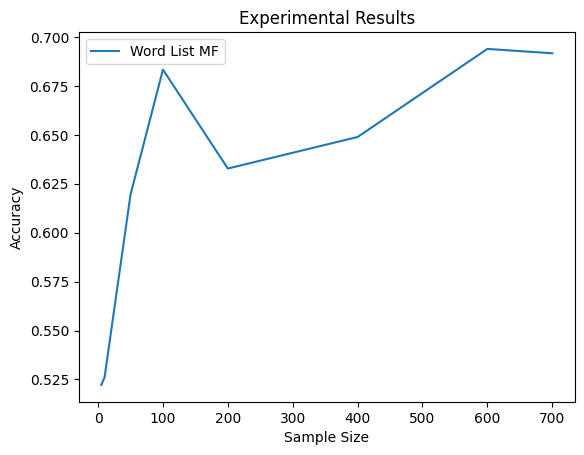

In [227]:
df=pd.DataFrame(results)
df=df.transpose()
df

ax = df.plot(kind="line",title="Experimental Results")
ax.set_ylabel("Accuracy")
ax.set_xlabel("Sample Size")

**Question 5a:**
In my graph, the accuracy score climbs significantly as the sample size grows from 5 to 100, at which point it begins to fluctuate while maintaining a high accuracy score. This may occur as a result of a longer wordlist capturing a wider range of emotions and subtleties. Increasing the wordlist length may not always result in appreciable improvements in accuracy. The presence of noise or irrelevant words may cause the classifier to plateau or exhibit diminishing returns.

**Question 5b:**
I recommend doing a wordlist classifier if the vocabulary and context are well-defined, as it offers a simple and understandable solution. On the other hand, I will still recommend a Naive Bayes classifier because it can handle larger datasets and can adapt to new vocabulary, which make it great. Generally, I think Naive Bayes classifiers will perform better when sufficient data is provided for training.

In the end, the decision should be made in light of the particular needs of the assignment, the type of data, and the trade-offs between simplicity and flexibility. It may be possible to ascertain which classifier performs better by experimenting and trying both strategies on your dataset.

In [228]:
##This code will word count all of the markdown cells in the notebook saved at filepath

import io
from nbformat import current

from google.colab import drive
drive.mount('/content/drive')

filepath="/content/drive/MyDrive/Colab Notebooks/ANLPassignment2023.ipynb"
question_count=432

with io.open(filepath, 'r', encoding='utf-8') as f:
    nb = current.read(f, 'json')

word_count = 0
for cell in nb.worksheets[0].cells:
    if cell.cell_type == "markdown":
        word_count += len(cell['source'].replace('#', '').lstrip().split(' '))
print("Submission length is {}".format(word_count-question_count))

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


FileNotFoundError: ignored